# Guide to Network Analysis (Part 5 - Generate OD Cost Matrix)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span><ul class="toc-item"><li><span><a href="#Differences-between-Closest-Facility-and-OD-cost-Matrix" data-toc-modified-id="Differences-between-Closest-Facility-and-OD-cost-Matrix-1.1">Differences between Closest Facility and OD cost Matrix</a></span></li></ul></li><li><span><a href="#Methods" data-toc-modified-id="Methods-2">Methods</a></span><ul class="toc-item"><li><span><a href="#Connect-to-GIS-object" data-toc-modified-id="Connect-to-GIS-object-2.1">Connect to GIS object</a></span></li><li><span><a href="#Method-1---using-arcgis.network.analysis.generate_origin_destination_cost_matrix" data-toc-modified-id="Method-1---using-arcgis.network.analysis.generate_origin_destination_cost_matrix-2.2">Method 1 - using arcgis.network.analysis.generate_origin_destination_cost_matrix</a></span><ul class="toc-item"><li><span><a href="#Problem-statement" data-toc-modified-id="Problem-statement-2.2.1">Problem statement</a></span></li><li><span><a href="#Define-Origins-and-Destinations-Feature-Class" data-toc-modified-id="Define-Origins-and-Destinations-Feature-Class-2.2.2">Define Origins and Destinations Feature Class</a></span></li><li><span><a href="#Solving-Problem" data-toc-modified-id="Solving-Problem-2.2.3">Solving Problem</a></span></li><li><span><a href="#Tabularizing-the-response-from-generate_origin_destination_cost_matrix" data-toc-modified-id="Tabularizing-the-response-from-generate_origin_destination_cost_matrix-2.2.4">Tabularizing the response from generate_origin_destination_cost_matrix</a></span></li><li><span><a href="#Visualizing-the-response-from-generate_origin_destination_cost_matrix" data-toc-modified-id="Visualizing-the-response-from-generate_origin_destination_cost_matrix-2.2.5">Visualizing the response from generate_origin_destination_cost_matrix</a></span></li></ul></li><li><span><a href="#Method-2---using-arcgis.features.use_proximity.connect_origins_to_destinations" data-toc-modified-id="Method-2---using-arcgis.features.use_proximity.connect_origins_to_destinations-2.3">Method 2 - using arcgis.features.use_proximity.connect_origins_to_destinations</a></span><ul class="toc-item"><li><span><a href="#Quick-facts-about-the-tool" data-toc-modified-id="Quick-facts-about-the-tool-2.3.1">Quick facts about the tool</a></span></li><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-2.3.2">Problem Statement</a></span></li><li><span><a href="#Define-Origins-and-Destinations-Layers" data-toc-modified-id="Define-Origins-and-Destinations-Layers-2.3.3">Define Origins and Destinations Layers</a></span></li><li><span><a href="#Solving-Problem-(With-output_name-specified)" data-toc-modified-id="Solving-Problem-(With-output_name-specified)-2.3.4">Solving Problem (With output_name specified)</a></span></li><li><span><a href="#Solving-Problem-(Without-output_name-specified)" data-toc-modified-id="Solving-Problem-(Without-output_name-specified)-2.3.5">Solving Problem (Without output_name specified)</a></span></li><li><span><a href="#Tabularizing-the-response-from-connect_origins_to_destinations" data-toc-modified-id="Tabularizing-the-response-from-connect_origins_to_destinations-2.3.6">Tabularizing the response from connect_origins_to_destinations</a></span></li><li><span><a href="#Visualizing-the-response-from-connect_origins_to_destinations" data-toc-modified-id="Visualizing-the-response-from-connect_origins_to_destinations-2.3.7">Visualizing the response from connect_origins_to_destinations</a></span></li></ul></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-3">Conclusions</a></span></li><li><span><a href="#References" data-toc-modified-id="References-4">References</a></span></li></ul></div>

## Introduction

Now we have learned about Network Datasets and Network Analysis Layer (NA Layer) in <a href="part1_introduction_to_network_analysis.ipynb">Part 1</a>, how to find routes from one point to another, and among multiple points in <a href="part2_find_routes.ipynb">Part 2</a>, hwo to generate service area in <a href="part3_generate_service_area.ipynb">Part 3</a>, and how to find closest facility in <a href="part4_find_closest_facilities.ipynb">Part 4</a>, let's move onto the fifth topic - how to create an `Origin Destination Cost Matrix`. Please refer to the road map below if you want to revisit the previous topics or jump to the next topic -

 - Network Dataset and Network Analysis services (<a href="part1_introduction_to_network_analysis.ipynb">Part 1</a>) 
 - Find Routes (<a href="part2_find_routes.ipynb">Part 2</a>)
 - Generate Service Area (<a href="part3_generate_service_area.ipynb">Part 3</a>)
 - Find Closest Facility (<a href="part4_find_closest_facilities.ipynb">Part 4</a>)
 - Generate Origin Destination Cost Matrix (You are here!)
 - Solve Location Allocation (<a href="part6_solve_location_allocation.ipynb">Part 6</a>)
 - Vehicle Routing Problem Service (<a href="part7_vehicle_routing_problem.ipynb">Part 7</a>)

An origin-destination (OD) cost matrix from multiple origins to multiple destinations, is a table that contains the cost, such as the travel time or travel distance, from each origin to each destination. Additionally, it ranks the destinations that each origin connects to in ascending order based on the minimum cost required to travel from that origin to each destination. When generating an OD cost matrix, you can optionally specify the maximum number of destinations to find for each origin and the maximum time or distance to travel when searching for destinations <a href="#References">[1]</a>.

The API of `Generate Origin Destination Cost Matrix` is useful when you need to find and measure the least-cost paths along the network from multiple origins to multiple destinations, and you can specify the number of destinations to find and a maximum distance to search. Note that, even though the OD cost matrix solver doesn't output lines that follow the network, the values stored in the Lines attribute table reflect the network distance, not the straight-line distance <a href="#References">[2]</a>.

<img src="https://pro.arcgis.com/en/pro-app/tool-reference/ready-to-use/GUID-A868225B-70BA-4A24-A696-010B8E005C25-web.png" />

Fig 1. The OD cost matrix found the least-cost paths from each origin to the four nearest destinations. The output shape type was set to produce straight lines (source: <a href="#References">[2]</a>). 

<img src="https://desktop.arcgis.com/en/arcmap/latest/extensions/network-analyst/GUID-29F22566-C4B9-4116-846A-DEE72012082D-web.png" />

Fig 2. Even though the OD cost matrix solver doesn't output lines that follow the network, the values stored in the Lines attribute table reflect the network distance, not the straight-line distance (source: <a href="#References">[3]</a>). 

This part of guide to Networking Analysis will help you measure the cost of traveling between origins and destinations. When you are ready, let's make your hands dirty with some real implementations!

### Differences between Closest Facility and OD cost Matrix

The closest facility and OD cost matrix solvers perform very similar analyses; the main difference, however, is in the output and the computation speed. 

OD cost matrix generates results more quickly but cannot return the true shapes of routes or their driving directions. It is designed to quickly solve large M x N problems and, as a result, does not internally contain the information required to generate route shapes and driving directions. 

Alternatively, the closest facility solver returns routes and directions but performs the analysis more slowly than the OD cost matrix solver. If you need driving directions or true shapes of routes, use the closest facility solver; otherwise, use the OD cost matrix solver to reduce the computation time <a href="#References">[2]</a>.

## Methods

The ArcGIS API for Python provides two ways to solve a OD Cost matrix problem, which as shown in the table below:

| Operation       | network.analysis       | features.use_proximity |
|-----------------|------------------------|------------------------|
| Route           | find_routes            | plan_routes       |
| ServiceArea     | generate_service_areas | create_drive_time_areas|
| ClosestFacility | find_closest_facilities| find_nearest |
| OD Cost Matrix  | **generate_origin_destination_cost_matrix**| **connect_origins_to_destinations** |

These two methods are defined in different modules of the arcgis package, and will make distinct REST calls in the back end. A key separation from `network.analysis` to `features.use_proximity` is that the former provides full capabilities of solvers and runs faster, and the latter is workflow-driven and provides service-to-service I/O approach.

We will walk through each one of these implementations and further explore the differences in the process. Getting started, let's first connect to a GIS instance.

### Connect to GIS object

In [1]:
from arcgis.gis import GIS
import arcgis.network as network
from arcgis.features import FeatureLayer, Feature, FeatureSet, use_proximity, FeatureCollection
import pandas as pd
import time
import datetime as dt

If you have already set up a profile to connect to your ArcGIS Online organization, execute the cell below to load the profile and create the GIS class object. If not, use a traditional username/password log-in e.g. `my_gis = GIS('https://www.arcgis.com', 'arcgis_python', 'P@ssword123', verify_cert=False, set_active=True)`

In [2]:
my_gis = GIS(profile="your_online_profile")

### Method 1 - using arcgis.network.analysis.generate_origin_destination_cost_matrix

#### Problem statement

Part 5 focuses on how to measure the cost of traveling from facilities to the incidents. Let's assume the first user story is like this:

Jim is an operator working for Medical Emergency Response Office, and needs to dispatch ambulance from nearby hospitals to the spot of incident. Now given the three incidents reported in Redlands and Loma Linda, is Jim able to provide an origin-destination cost matrix?

Now that Jim's objectives are defined, we can go onto break down the problem:
 - Data: where to access the input datasets
 - Methods: what tools can be used to build the network model and perform OD Cost Matrix analysis
 - Tables and maps: deliverables in which directions and routes are visualized.
 
Let's first access and/or explore the input datasets (in this case, the origins and destinations feature class).

#### Define Origins and Destinations Feature Class

`Generate Origin Destination Cost Matrix` can be associated with a local network dataset or a network service hosted in ArcGIS Online or ArcGIS Enterprise. Here, we will be using an existing feature layer that contains hospitals derived from various sources (refer SOURCE field) for the Homeland Infrastructure Foundation-Level Data (HIFLD) database (https://gii.dhs.gov/HIFLD), which can be accessed from `esri_livingatlas`.

If you do not have access to the hospital layer provided by `Esri_livingatlas` as referenced in the cell below, an alternative approach is for you to download the hospital listing of San Bernadino County from this <a href="https://data.chhs.ca.gov/datastore/dump/641c5557-7d65-4379-8fea-6b7dedbda40b?q=&sort=_id+asc&fields=OSHPD_ID%2CFACILITY_NAME%2CLICENSE_NUM%2CFACILITY_LEVEL_DESC%2CDBA_ADDRESS1%2CDBA_CITY%2CDBA_ZIP_CODE%2CCOUNTY_CODE%2CCOUNTY_NAME%2CER_SERVICE_LEVEL_DESC%2CTOTAL_NUMBER_BEDS%2CFACILITY_STATUS_DESC%2CFACILITY_STATUS_DATE%2CLICENSE_TYPE_DESC%2CLICENSE_CATEGORY_DESC%2CLATITUDE%2CLONGITUDE&filters=%7B%22COUNTY_CODE%22%3A+%5B%2236%22%5D%7D&format=csv">source</a> and publish the csv to the organization before proceeding forward.

You do not have permissions to access this resource or perform this operation.


Trying from an alternative source...


<Item title:"hospitals_SB_county" type:Feature Layer Collection owner:arcgis_python>
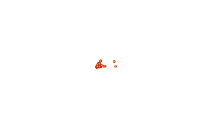

In [3]:
""" This try-except block will help you download the CSV and publish to current GIS object, if 
    "You do not have permissions to access this resource or perform this operation."
"""
try:
    hospital_item = my_gis.content.get("a2817bf9632a43f5ad1c6b0c153b0fab")
except RuntimeError as ne:
    try:
        print("Trying from an alternative source...")
        hospital_item = my_gis.content.get("50fb63f303304835a048d16bd86c3024")
    except RuntimeError as ne:
        print("Trying to publish from csv...")
        import requests
        import csv
        import os

        out_file_name = 'hospitals_SB_county.csv'
        url = "https://data.chhs.ca.gov/datastore/dump/641c5557-7d65-4379-8fea-6b7dedbda40b?q=&sort=_id+asc&fields=OSHPD_ID%2CFACILITY_NAME%2CLICENSE_NUM%2CFACILITY_LEVEL_DESC%2CDBA_ADDRESS1%2CDBA_CITY%2CDBA_ZIP_CODE%2CCOUNTY_CODE%2CCOUNTY_NAME%2CER_SERVICE_LEVEL_DESC%2CTOTAL_NUMBER_BEDS%2CFACILITY_STATUS_DESC%2CFACILITY_STATUS_DATE%2CLICENSE_TYPE_DESC%2CLICENSE_CATEGORY_DESC%2CLATITUDE%2CLONGITUDE&filters=%7B%22COUNTY_CODE%22%3A+%5B%2236%22%5D%7D&format=csv"
        download = requests.get(url)

        with open(out_file_name, 'w') as out_file:
            out_file.writelines(download.text)
            print(out_file_name)
        csv_item = my_gis.content.add({}, out_file_name)
        hospital_item = csv_item.publish()
display(hospital_item)

In [4]:
hospital_fl = FeatureLayer(hospital_item.url + "/0")

""" If you are using the exisiting layer from Esri_LivngAtlas, there is a "County" column in the dataset;
    or else, the feature layer collection published from the downloaded CSV file is already targetted at SB County.
"""
try:
    facilities = hospital_fl.query(where="County='SAN BERNARDINO' AND State='CA'", as_df=False)
except RuntimeError as re:
    """ when seeing 'Invalid field: County' parameter is invalid
    """
    print("Trying from an alternative approach...")
    facilities = hospital_fl.query(where="Dba_city='REDLANDS' or Dba_city='LOMA LINDA'", as_df=False)
display(facilities)


'Invalid field: County' parameter is invalid


Trying from an alternative approach...


<FeatureSet> 33 features

Now we have the `facilities layer` ready, we can go onto define the `incidents layer`. Here, we randomly picked six locations in Redlands, CA.

In [5]:
incidents_json = {
                    "features": [{"attributes": {"CurbApproach": 0,
                                                 "ID": "C100045",
                                                 "Name": "Incident at Esri"},
                                  "geometry": {"x": -117.19569523299998, "y": 34.05608640000003}},
                                 {"attributes": {"CurbApproach": 0,
                                                 "ID": "F100086",
                                                 "Name": "Incident at APT"},
                                  "geometry": {"x": -117.20520037855628, "y": 34.04472649163186}},
                                 {"attributes": {"CurbApproach": 0,
                                                 "ID": "C100097",
                                                 "Name": "Incident at Walmart"},
                                  "geometry": {"x": -117.222253, "y": 34.065378}},
                                 {"attributes": {"CurbApproach": 0,
                                                 "ID": "C100097",
                                                 "Name": "Incident at High school"},
                                  "geometry": {"x": -117.192296, "y": 34.060759}},
                                 {"attributes": {"CurbApproach": 0,
                                                 "ID": "C100097",
                                                 "Name": "Incident at Bowling"},
                                  "geometry": {"x": -117.194699, "y": 34.063568}},
                                 {"attributes": {"CurbApproach": 0,
                                                 "ID": "C100097",
                                                 "Name": "Incident at Burger"},
                                  "geometry": {"x": -117.201201, "y": 34.063364}}],
                    "spatialReference": {"wkid": 4326, "latestWkid": 4326},
                    "geometryType": "esriGeometryPoint",
                    "fields" : [
                        {"name" : "ID", "type" : "esriFieldTypeString", "alias" : "ID", "length" : "50"},
                        {"name" : "Name", "type" : "esriFieldTypeString", "alias" : "Name", "length" : "50"},
                        {"name" : "CurbApproach", "type" : "esriFieldTypeInteger", "alias" : "CurbApproach"}
                    ]
                }
incidents = FeatureSet.from_dict(incidents_json)

Let's have the two layers visualized in the map view.


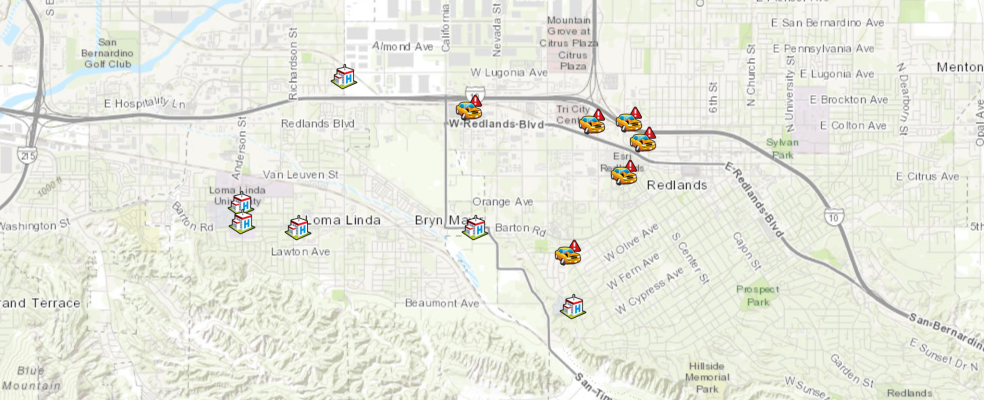

In [82]:
map1 = my_gis.map('Redlands, CA', zoomlevel=12)
map1

In [11]:
map1.clear_graphics()

hospital_symbol = {"type":"esriPMS",
                   "url":"http://static.arcgis.com/images/Symbols/SafetyHealth/Hospital.png",
                   "contentType": "image/png", "width":20, "height":20}

map1.draw(facilities, symbol=hospital_symbol)

In [12]:
traffic_accident_symbol = {"type":"esriPMS",
                           "url":"http://static.arcgis.com/images/Symbols/Transportation/TrafficAccident.png",
                           "contentType": "image/png", "width":20, "height":20}

map1.draw(incidents, symbol=traffic_accident_symbol)

The cell below is for display purposes (later use).

#### Solving Problem

What's worth mentioning is that, in using `generate_origin_destination_cost_matrix`, 0.0005 credits per input origin and destination pair will be charged. For example, if there are 100 origins and 200 destinations, the cost will be 10 credits. If you specify a cutoff or limit the number of destinations, for instance, to find only 5 closest destinations within 10 minutes of every origin, the cost will still be 10 credits, as the credits depend on the number of input origin destination pairs.

`TargetDestinationCount`- The maximum number of destinations that must be found for the origin. If a value is not specified, the value from the Number of Destinations to Find parameter is used.

`Cutoff`- Specify the travel time or travel distance value at which to stop searching for destinations from the origin. Any destination beyond the cutoff value will not be considered. The value needs to be in the units specified by the Time Units parameter if the impedance attribute in your travel mode is time based or in the units specified by the Distance Units parameter if the impedance attribute in your travel mode is distance based. If a value is not specified, the tool will not enforce any travel time or travel distance limit when searching for destinations.

Specify `origin_destination_line_shape` to see the output in map. Even though the lines are straight for performance reasons, they always store the travel time and travel distance along the street network, not straight-line distance.

Note: You can set `save_output_network_analysis_layer` to True if you want to output the resulting NA layer as Layer file, though this process can take up more computation time <a href="#References">[4]</a>.

In [6]:
%%time

current_time= dt.datetime.now()

result1 = network.analysis.generate_origin_destination_cost_matrix(origins=incidents, destinations=facilities, 
                                                                   cutoff=10, time_of_day=current_time, 
                                                                   number_of_destinations_to_find=4,
                                                                   origin_destination_line_shape='Straight Line',
                                                                   gis=my_gis)

Wall time: 9.96 s


Now, check if the tool is run successfully, and what are types of the elements in the returned result set, and also get the output network analysis layer's url.

In [7]:
print('Analysis succeeded? {}'.format(result1.solve_succeeded))

Analysis succeeded? True


In [8]:
display(result1.output_origin_destination_lines,result1.output_origins, result1.output_destinations)

<FeatureSet> 24 features

<FeatureSet> 6 features

<FeatureSet> 33 features

#### Tabularizing the response from generate_origin_destination_cost_matrix

Now, let's see the output lines table.

In [9]:
result1.output_origin_destination_lines.sdf.tail()

,DestinationName,DestinationOID,DestinationRank,ObjectID,OriginName,OriginOID,SHAPE,Shape_Length,Total_Distance,Total_Time
19,Location 4,23,4,20,Incident at Bowling,5,"{'paths': [[[-117.19469899999996, 34.063568000...",0.014748,1.909752,4.037410
20,Location 31,357,1,21,Incident at Burger,6,"{'paths': [[[-117.20120099999997, 34.063364000...",0.001528,0.202159,0.677187
21,Location 27,245,2,22,Incident at Burger,6,"{'paths': [[[-117.20120099999997, 34.063364000...",0.005566,0.684698,1.962074
22,Location 28,256,3,23,Incident at Burger,6,"{'paths': [[[-117.20120099999997, 34.063364000...",0.005566,0.684698,1.962074
23,Location 5,41,4,24,Incident at Burger,6,"{'paths': [[[-117.20120099999997, 34.063364000...",0.016599,2.204520,4.090406


In [10]:
# filter only the required columns
od_df = result1.output_origin_destination_lines.sdf[['OriginName', 'OriginOID','DestinationOID','Total_Distance','Total_Time']]
display(od_df)

,OriginName,OriginOID,DestinationOID,Total_Distance,Total_Time
0,Incident at Esri,1,245,1.103517,2.396057
1,Incident at Esri,1,256,1.103517,2.396057
2,Incident at Esri,1,357,1.229031,2.890649
3,Incident at Esri,1,23,1.710835,3.660359
4,Incident at APT,2,41,0.431708,1.152137
5,Incident at APT,2,65,0.692399,1.344741
6,Incident at APT,2,90,1.093573,1.947449
7,Incident at APT,2,316,1.288073,2.148122
8,Incident at Walmart,3,121,1.269695,3.305636
9,Incident at Walmart,3,207,1.413950,3.490520


We need to change the format to get a matrix with rows as origins and columns as destinations, with impedance value as travel time or travel distance. We will use the `pivot_table` feature of Pandas to accomplish that.

Note that `number_of_destinations_to_find` is set to 4, so for the destinations that are not within the top 4 closest to the origins, the `total_distance` will shows as `NaN` in the output table below:

In [11]:
# user pivot_table
od_pivot = od_df.pivot_table(index='OriginOID', columns='DestinationOID')
od_pivot

Total_Distance                                          \
DestinationOID            23        41        48        65        90    
OriginOID                                                               
1                    1.710835       NaN       NaN       NaN       NaN   
2                         NaN  0.431708       NaN  0.692399  1.093573   
3                         NaN       NaN  1.978585       NaN       NaN   
4                    1.269365       NaN       NaN       NaN       NaN   
5                    1.909752       NaN       NaN       NaN       NaN   
6                         NaN  2.204520       NaN       NaN       NaN   

                                                                 ...  \
DestinationOID       121      207       245       256       316  ...   
OriginOID                                                        ...   
1                    NaN      NaN  1.103517  1.103517       NaN  ...   
2                    NaN      NaN       NaN       NaN  1.288073  ...   
3               1.269695  1.41395       NaN       NaN       NaN  ...   
4                    NaN      NaN  1.295173  1.295173       NaN  ...   
5                    NaN      NaN  1.137488  1.137488       NaN  ...   
6                    NaN      NaN  0.684698  0.684698       NaN  ...   

               Total_Time                                                   \
DestinationOID        41        48        65        90        121      207   
OriginOID                                                                    
1                     NaN       NaN       NaN       NaN       NaN      NaN   
2                1.152137       NaN  1.344741  1.947449       NaN      NaN   
3                     NaN  4.739107       NaN       NaN  3.305636  3.49052   
4                     NaN       NaN       NaN       NaN       NaN      NaN   
5                     NaN       NaN       NaN       NaN       NaN      NaN   
6                4.090406       NaN       NaN       NaN       NaN      NaN   

                                                        
DestinationOID       245       256       316       357  
OriginOID                                               
1               2.396057  2.396057       NaN  2.890649  
2                    NaN       NaN  2.148122       NaN  
3                    NaN       NaN       NaN  4.802403  
4               2.325588  2.325588       NaN  2.475979  
5               2.753135  2.753135       NaN  2.088215  
6               1.962074  1.962074       NaN  0.677187  

[6 rows x 22 columns]

If you want to export the pivot table into a file, use `to_csv` to save as file-based csv output.

In [26]:
od_pivot.to_csv('data/OD_Matrix.csv')

#### Visualizing the response from generate_origin_destination_cost_matrix

With the customized symbologies defined here, `output_origin_destination_lines` can also be rendered on the map view:

In [13]:
""" Define a list of colors/styles for routes;
    alternatively, use "'type': 'simple-line', 'style': 'solid'"
"""
allocation_line_symbol = [{'type': 'esriSLS', 'style': 'esriSLSSolid',
                            'color': [237, 17, 189, 100], 'width': 6},
                          {'type': 'esriSLS', 'style': 'esriSLSSolid',
                            'color': [30, 139, 235, 90], 'width': 6},
                          {'type': 'esriSLS', 'style': 'esriSLSSolid',
                            'color': [66, 240, 43, 80], 'width': 6},
                          {'type': 'esriSLS', 'style': 'esriSLSSolid',
                            'color': [240, 234, 67, 70], 'width': 6}]

names_list = ["Incident at Esri",
              "Incident at APT",
              "Incident at Walmart",
              "Incident at High school",
              "Incident at Bowling",
              "Incident at Burger"]


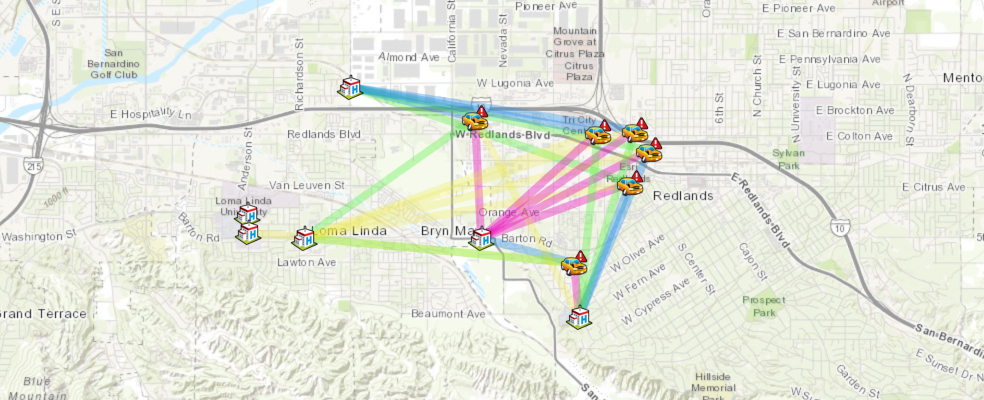

In [83]:
map2 = my_gis.map('Redlands, CA', zoomlevel=12)
map2

In [14]:
count1 = 0
count2 = 0

for route in result1.output_origin_destination_lines:
    route_name = route.get_value("OriginName") + " ---> " + route.get_value("DestinationName")
    print(route_name)
     #get the name
    name = route.attributes['OriginName']
    #get the color
    fill_symbol=allocation_line_symbol[count1%4]
    
    if names_list[0] in name:
        count1+=1
    else:
        fill_symbol=allocation_line_symbol[count2%4]
        count2+=1

    #set popup
    popup={"title": "OD cost matrix {}".format(route_name), 
           "content": "{} minutes".format(route.attributes['Total_Time'])}
    
    map2.draw(route.geometry, symbol=fill_symbol, popup=popup, attributes={"title": route_name})
    time.sleep(2)

Incident at Esri ---> Location 27
Incident at Esri ---> Location 28
Incident at Esri ---> Location 31
Incident at Esri ---> Location 4
Incident at APT ---> Location 5
Incident at APT ---> Location 12
Incident at APT ---> Location 16
Incident at APT ---> Location 30
Incident at Walmart ---> Location 23
Incident at Walmart ---> Location 26
Incident at Walmart ---> Location 6
Incident at Walmart ---> Location 31
Incident at High school ---> Location 27
Incident at High school ---> Location 28
Incident at High school ---> Location 31
Incident at High school ---> Location 4
Incident at Bowling ---> Location 31
Incident at Bowling ---> Location 27
Incident at Bowling ---> Location 28
Incident at Bowling ---> Location 4
Incident at Burger ---> Location 31
Incident at Burger ---> Location 27
Incident at Burger ---> Location 28
Incident at Burger ---> Location 5


In [16]:
map2.draw(result1.output_destinations, symbol=hospital_symbol)

In [45]:
map2.draw(result1.output_origins, symbol=traffic_accident_symbol)

The map view can be also saved into a web map for future references.

In [46]:
item_properties = {
    "title": "OD Cost Matrix from incidents to hospitals in San Bernadino County",
    "tags" : "OD Cost Matrix",
    "snippet": "OD Cost Matrix from incidents to hospitals in San Bernadino County",
    "description": "a web map of OD Cost Matrix from incidents to hospitals in San Bernadino County"
}

item = map2.save(item_properties)
item

<Item title:"OD Cost Matrix from incidents to hospitals in San Bernadino County" type:Web Map owner:arcgis_python>

We have been using the `generate_origin_destination_cost_matrix` tool in the `network.analysis` module up to this point. From now on, let's use a different method - `connect_origins_to_destinations` - defined in the `features.use_proximity` module, to achieve a workflow driven, Feature Service to Feature Service user experience.

### Method 2 - using arcgis.features.use_proximity.connect_origins_to_destinations

#### Quick facts about the tool

The `Connect Origins to Destinations` task measures the travel time or distance between pairs of points. Using this tool, you can

 - Calculate the total distance or time commuters travel on their home-to-work trips.
 - Measure how far customers are traveling to shop at your stores. Use this information to define your market reach, especially when targeting advertising campaigns or choosing new store locations.
 - Calculate the expected trip mileage for your fleet of vehicles. Afterward, run the Summarize Within tool to report mileage by state or other region.

You provide starting and ending points, and the tool returns a layer containing route lines, including measurements, between the paired origins and destinations.

#### Problem Statement

Now say Jim has changed his job and become a logistics analyst for a shipping company, and he needs to look into the OD cost matrix from where his company is at (Detroit, MI) to seven other cities in the Lake Area. What would Jim do to perform his day-to-day scheduling?

First, Jim needs to set down the origins and destinations layers for the transportation demands.

#### Define Origins and Destinations Layers

Get access to the existing feature service titled "USA Major Cities":

<Item title:"USA Major Cities" type:Feature Layer Collection owner:esri_dm>
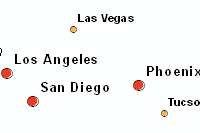

In [6]:
sample_cities = my_gis.content.search('title:"USA Major Cities" type:Feature Service', 
                                      outside_org=True)[0]
sample_cities

In [7]:
cities_fl = FeatureLayer(sample_cities.url + "/0")
type(cities_fl)

arcgis.features.layer.FeatureLayer

The cities that all the goodies will be transported to are:

In [8]:
stops_cities = ['Chicago', 'Indiannapolis', 'Cleveland',
                'Columbus', 'pittsburgh', 'Buffalo']
values = "'" + "', '".join(stops_cities) + "'"
stops_layer = {'url': sample_cities.layers[0].url, 
               'filter': "ST in ('IL', 'IN', 'OH', 'PA', 'NY')  AND NAME IN ({0})".format(values)}

In [9]:
end_cities_fset = cities_fl.query(where="ST in ('WI', 'IL', 'IN', 'OH', 'PA', 'NY')  AND NAME IN ({0})".format(values), as_df=False)
end_cities_fset

<FeatureSet> 6 features

Where the transportation get started is:

In [10]:
start_layer = {'url': sample_cities.layers[0].url, 
               'filter': "ST in ('MI')  AND NAME IN ('Detroit')"}

In [11]:
start_cities_fset = cities_fl.query(where="ST in ('MI')  AND NAME IN ('Detroit')", as_df=False)
start_cities_fset

<FeatureSet> 1 features

#### Solving Problem (With output_name specified)

With `output_name` specified, the return type is a `Feature Layer Collection` Item, and the layer containing route lines, including measurements, between the paired origins and destinations.

In [24]:
%%time

result2 = use_proximity.connect_origins_to_destinations(origins_layer=start_layer, 
                                                        destinations_layer=stops_layer,
                                                        context={'outSR': {"wkid": 4326}},
                                                        time_of_day=current_time,     
                                                        output_name="OD Cost Matrix (Oct 2019)",
                                                        gis=my_gis)

Network elements with avoid-restrictions are traversed in the output (restriction attribute names: "Avoid Unpaved Roads" "Through Traffic Prohibited").


Wall time: 51.4 s


In [25]:
result2

<Item title:"OD Cost Matrix (Oct 2019)" type:Feature Layer Collection owner:arcgis_python>

The first sublayer of `result2` is the nearest facilities, and the second sublayer is the route.

In [26]:
od_cost_matrix_sublayer = FeatureLayer.fromitem(result2, layer_id=0)
od_cost_matrix_sublayer.url

'https://services7.arcgis.com/JEwYeAy2cc8qOe3o/arcgis/rest/services/OD Cost Matrix (Oct 2019)/FeatureServer/0'

In [27]:
od_df = od_cost_matrix_sublayer.query(where='1=1', as_df=True)

# filter only the required columns
od_df2 = od_df[['RouteName','OriginOID','DestinationOID','Total_Miles','StartTime','EndTime','Total_Minutes']]
od_df2.tail(6)

,RouteName,OriginOID,DestinationOID,Total_Miles,StartTime,EndTime,Total_Minutes
0,Route 1 - Detroit - Chicago,1533,63,275.444212,2019-10-24 19:56:17,2019-10-24 23:17:48,261.514763
1,Route 2 - Detroit - Columbus,1533,256,326.222952,2019-10-24 19:56:17,2019-10-25 01:06:55,310.638586
2,Route 3 - Detroit - Buffalo,1533,2075,259.663696,2019-10-24 19:56:17,2019-10-25 00:28:21,272.074868
3,Route 4 - Detroit - Cleveland,1533,2385,168.146931,2019-10-24 19:56:17,2019-10-24 22:41:58,165.690078
4,Route 5 - Detroit - Columbus,1533,256,199.968721,2019-10-24 19:56:17,2019-10-24 23:18:16,201.984500
5,Route 6 - Detroit - Pittsburgh,1533,2989,285.264445,2019-10-24 19:56:17,2019-10-25 00:27:18,271.010365


As shown here, the six routes from origin (Detroit) to destinations (Chicago, Columbus, etc.) are shown in the matrix above, with start_time, end_time, total_minutes and total_miles. We can also pivot the table, and summarize these six routes with their sole "total_minutes" attribute.

In [28]:
# user pivot_table
od_pivot = od_df2.pivot_table(index='OriginOID', columns='DestinationOID')
od_pivot

Total_Miles                                                  \
DestinationOID        63          256         2075        2385        2989   
OriginOID                                                                    
1533            275.444212  263.095837  259.663696  168.146931  285.264445   

               Total_Minutes                                                  
DestinationOID          63          256         2075        2385        2989  
OriginOID                                                                     
1533              261.514763  256.311543  272.074868  165.690078  271.010365

Also, we can then go onto map the routes, the origin and the destinations on the map view:


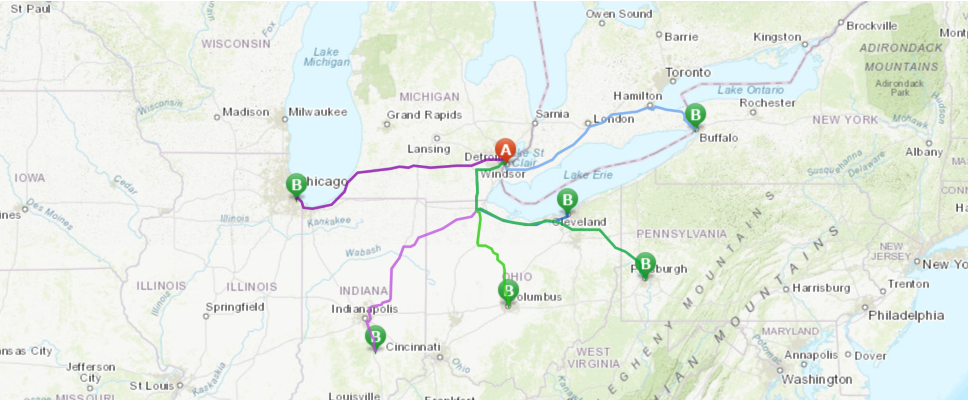

In [84]:
map4a = my_gis.map('Detriot, MI', zoomlevel=8)
map4a

In [69]:
map4a.clear_graphics()

In [70]:
start_symbol = {"angle":0,"xoffset":0,"yoffset":8.15625,"type":"esriPMS",
                "url":"http://static.arcgis.com/images/Symbols/AtoZ/redA.png",
                "contentType":"image/png","width":15.75,"height":21.75}

end_symbol = {"angle":0,"xoffset":0,"yoffset":8.15625,"type":"esriPMS",
              "url":"http://static.arcgis.com/images/Symbols/AtoZ/greenB.png",
              "contentType":"image/png","width":15.75,"height":21.75}

In [71]:
map4a.draw(start_cities_fset, symbol=start_symbol)

In [72]:
map4a.draw(end_cities_fset, symbol=end_symbol)

Note that the origin and destinations are symbolized as FeatureSet, while the resulting routes are added to the map view as Feature Layer.

In [73]:
map4a.add_layer(result2)

Now we have seen how a Feature Service (input) to Feature service (output) works, let's explore a more traditional way of solving/parsing/tabularizing/drawing user experience.

#### Solving Problem (Without output_name specified)

Without specifying `output_name` in the argument list, the return type is a dictionary of four entries:

In [12]:
%%time

result2b = use_proximity.connect_origins_to_destinations(origins_layer=start_layer, 
                                                         destinations_layer=stops_layer,
                                                         context={'outSR': {"wkid": 4326}},
                                                         time_of_day=current_time,     
                                                         gis=my_gis)

Network elements with avoid-restrictions are traversed in the output (restriction attribute names: "Avoid Unpaved Roads" "Through Traffic Prohibited").


Wall time: 37.9 s


In [13]:
result2b

{'routes_layer': <FeatureCollection>,
 'unassigned_origins_layer': '',
 'unassigned_destinations_layer': '',
 'route_layer_items': ''}

Looking at the time lapse taken in the execution of the previous cell, solver without outputting a feature layer works much faster (37.9 seconds compared to 51.4 seconds).

#### Tabularizing the response from connect_origins_to_destinations

We then take advantage of the `routes_layer` component of the returned object in creating a pandas dataframe displaying the OD cost matrix for Detroit to six destinations.

In [14]:
df5 = result2b["routes_layer"].query().sdf
df5[['RouteName','OriginOID','DestinationOID','Total_Miles','StartTime','EndTime','Total_Minutes']]

,RouteName,OriginOID,DestinationOID,Total_Miles,StartTime,EndTime,Total_Minutes
0,Route 1 - Detroit - Chicago,1533,63,275.444212,2019-10-31 23:11:30,2019-11-01 02:24:14.476999998,252.741290
1,Route 2 - Detroit - Columbus,1533,256,322.114356,2019-10-31 23:11:30,2019-11-01 04:15:55.417999983,304.423627
2,Route 3 - Detroit - Buffalo,1533,2075,259.663696,2019-10-31 23:11:30,2019-11-01 03:38:20.026000023,266.833772
3,Route 4 - Detroit - Cleveland,1533,2385,168.146931,2019-10-31 23:11:30,2019-11-01 01:49:56.456000090,158.440937
4,Route 5 - Detroit - Columbus,1533,256,199.968721,2019-10-31 23:11:30,2019-11-01 02:25:21.056999922,193.850944
5,Route 6 - Detroit - Pittsburgh,1533,2989,285.264445,2019-10-31 23:11:30,2019-11-01 03:36:11.479000092,264.691321


#### Visualizing the response from connect_origins_to_destinations

First create the map view, then customize the symbologies for the service areas and the facilities, and finally render the routes and stops.


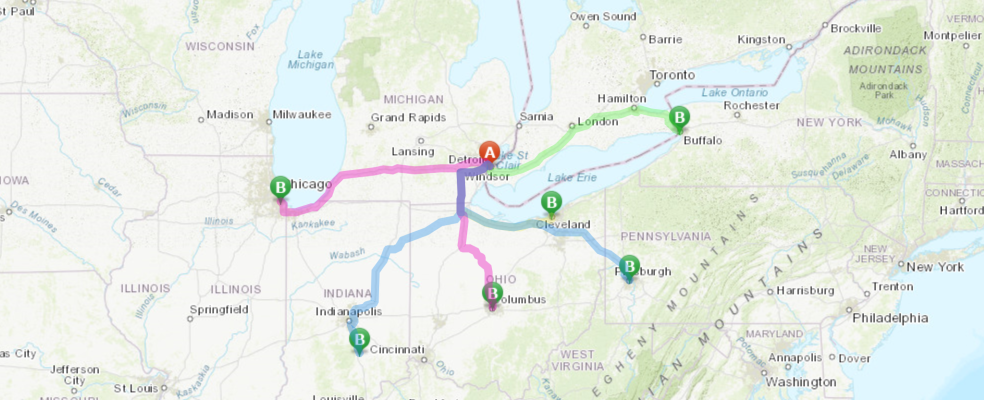

In [85]:
map4b = my_gis.map('Detroit, MI', zoomlevel=8)
map4b

In [35]:
count1 = 0
count2 = 0

for route in result2b["routes_layer"].query():
    
    #get the name
    name = route.attributes['RouteName']
    #get the color
    fill_symbol=allocation_line_symbol[count1%4]
    
    if names_list[0] in name:
        count1+=1
    else:
        fill_symbol=allocation_line_symbol[count2%4]
        count2+=1

    #set popup
    popup={"title": "OD cost matrix {}".format(route.attributes['RouteName']), 
           "content": "{} minutes".format(route.attributes['Total_Minutes'])}
    
    map4b.draw(route.geometry, symbol=fill_symbol, popup=popup, attributes={"title":route.attributes['RouteName']})
    time.sleep(2)

In [36]:
map4b.draw(start_cities_fset, symbol=start_symbol)
map4b.draw(end_cities_fset, symbol=end_symbol)

In [81]:
item_properties["title"] = "OD Cost matrix from Detriot to nearby major cities"

item = map4b.save(item_properties)
item

<Item title:"OD Cost matrix from Detriot to nearby major cities" type:Web Map owner:arcgis_python>

In the last section of this guide, we have adopted a different method - `arcgis.features.use_proximity.connect_origins_to_destinations` - in creating OD cost matrix. In doing so, we also explored the two scenarios with output_name specified (which forms a Feature Service to Feature Service user experience), and a more traditional compute/parse/draw approach when output_name is not present.

## Conclusions

This part of network Analysis Guide demonstrated how you can constuct an OD cost matrix using the ArcGIS API for Python. We started by defining origins and destinations layers, then used the `generate_origin_destination_cost_matrix()` method under the `arcgis.network.analysis` module, and/or the `use_proximity.connect_origins_to_destinations()` method under `arcgis.features` to compute the OD cost matrix.

The OD cost matrix becomes an important analytical output for downstream routing and other network analysis problems. Imagine you run a pizza restaurant and receive orders for delivery in a central location. Based on the distance to these demand points, you need to decide which supply point (pizza place) should service which demand point (customer address). You can solve problems such as these by computing the OD cost matrix.

## References

[1] "Tutorial: Generate Origin Destination Cost Matrix", https://pro.arcgis.com/en/pro-app/help/analysis/networks/od-cost-matrix-tutorial.htm, accessed 10/07/2019

[2] "OD cost matrix analysis layer", https://pro.arcgis.com/en/pro-app/help/analysis/networks/od-cost-matrix-analysis-layer.htm, accessed on 10/07/2019

[3] "OD cost matrix analysis", https://desktop.arcgis.com/en/arcmap/latest/extensions/network-analyst/od-cost-matrix.htm, accessed on 10/07/2019

[4] "Calculating Origin Destinations nXn Matrix given set of origins and destinations", https://developers.arcgis.com/python/sample-notebooks/calculating-nxn-od-cost-matrix/, accessed on 10/09/2019